In [1]:
#importing the needed libraries
import pickle
import math
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import winter

%matplotlib inline
#gets pickle files from directories
pickleContents = open ( r"C:\Users\DGama\OneDrive\Documents\School\poly\SURP-2024\NS_SURP2024\week_2-3\eostable.pk", "rb" )

pickle = pickle.load(pickleContents)

#retrive the local values from the pickle binary, and stores them in the correspoing list
p_local = pickle["DS_CMF1_wcrust/"]['ps']
rho_local = pickle["DS_CMF1_wcrust/"]['rhos']

In [2]:
#ps_to_rhos routine
def ps_to_rho(p_target):
    
    #rho_local = x
    for x in range(len(rho_local)-1):
    #first case: when the p_targer is less that the first value of the p_local
        if p_target < p_local[0]:
                p_target = p_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if p_target >= p_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                p_target = p_local[-1]
                x = len(p_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if p_local[x] < p_target and p_local[x+1] > p_target:
                #local = x
                break
   # print("rho_Local:",rho_local[x],)
    rho_target = rho_local[x] + (((rho_local[x+1] - rho_local[x]) / (p_local[x+1] - p_local[x])) * (p_target - p_local[x]))
    return rho_target
##

In [3]:
##
#rhos to ps subroutine
def rho_to_ps(rho_target):
    for x in range(len(rho_local)-1):
        
        #p_local = x
    #first case: when the p_targer is less that the first value of the p_local
        if rho_target < rho_local[0]:
                rho_target = rho_local[0]
                x = 0
                break
    #second case: when the p_target is greater than the last value of the p_local    
        if rho_target >= rho_local[-1]:
                #have to do this as otherwise it would try to access a value that does not exist
                rho_target = rho_local[-1]
                x = len(rho_local)-2
                break
    #Deafult case, When the rho target is between the given parameters needed
        if rho_local[x] < rho_target and rho_local[x+1] > rho_target:
                #local = x
                break
    #Equation used:  
    #print("p_Local: ",p_local[x])
    p_target = p_local[x] + (((p_local[x+1] - p_local[x]) / (rho_local[x+1] - rho_local[x])) * (rho_target - rho_local[x]))
    
    return p_target
##

In [4]:
def euler(rho_c, dr):
    
    pass

    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Declaring variables
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    
    p = rho_to_ps(rho)
    
    #forgot to initiate before using
    #i replace every other instance of m with mr 
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
   

#pulled the exponent value from google for these ones as the physics book gave me metric values
#if these are wrong the exponent would be the issue, the other numbers should be okay(hopefully)
#
 ###
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 
    for i in range(10000):
    
        # calculate the derivative
        #most the issues here where from wrong syntax and forgetting physics constants 
        
        
        #debuging to see whats variable is storing
        
        print("for loop iteration: ", i)
        print("r",r)
        print("p",p)
        print("mr",mr)
        print("rho",rho)
        print("------------")
        #should be commented out once debugging is complete
        
        #Tolman-Oppenheimer-Volkoff Equation
        #re wrote the equation thinking that was the issue, it turs out not putting in parantetheses each part of the fraction
        #that caused mr in the first case multiplyhing stuff by 0 leading to all values being null exept for r
        
        #dPdr = ((G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+(4*pi*r**3*p)/(mr*c**2))*((1-((2*G*mr)/(c**2*r))**-1))
        dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)   
        #Mass conversion equation
        dmdr = 4*pi*r**2*rho
        
        #final notes at 6/14/2024 at 3:12, the issue with the euler method running seems to be at mr*c**2 making a division by zero
        #while i belive that the change could be fixed in less than 20 minutes, i have worked on finishing this up since 7 and thus will wait till the progress report for this
        
        # use the derivative 
        m_new = mr + dmdr * dr
        p_new = p + dPdr * dr
        #call subroutine to find rho from p_new
        rho_new = ps_to_rho(p_new)
        r_new = r + dr
        
        # append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        
        #print(r, rho, p, mr)
        
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            print("break condition met!")
            print(rho , " < ", 1**-4*rho_c)
            break
        # setup criteria to end the calculation
        # this is to prevent the graph to be 90% a flat graph isnce thwe change of desity will be neglible
  
    rs = np.array(rs)
    rhos = np.array(rhos)
    ps = np.array(ps)
    ms = np.array(ms)

    return rs, rhos, ps, ms



    
#rs, rhos, ps, ms = euler(1e15,1000)

#

for loop iteration:  0
r 1000
p 2.2867672859170018e+35
mr 4.1887902047863903e+24
rho 1000000000000000.0
------------
for loop iteration:  1
r 2000
p 2.2867611018730888e+35
mr 1.6755160819145563e+25
rho 999998708501238.2
------------
for loop iteration:  2
r 3000
p 2.286752240870819e+35
mr 6.70205783587739e+25
rho 999996857936523.6
------------
for loop iteration:  3
r 4000
p 2.2867379752241195e+35
mr 1.801175585289992e+26
rho 999993878645737.9
------------
for loop iteration:  4
r 5000
p 2.286717842255844e+35
mr 3.811782575874448e+26
rho 999989674001662.9
------------
for loop iteration:  5
r 6000
p 2.2866916920362383e+35
mr 6.953342789383723e+26
rho 999984212692410.1
------------
for loop iteration:  6
r 7000
p 2.286659459424882e+35
mr 1.147716479045608e+27
rho 999977481113812.0
------------
for loop iteration:  7
r 8000
p 2.2866211108686564e+35
mr 1.763454773096394e+27
rho 999969472258509.9
------------
for loop iteration:  8
r 9000
p 2.2865766270604207e+35
mr 2.5676779405489117e+27


In [5]:
def find_mass(ms):
    return ms[-1]
def find_radius(rs):
    return rs[-1]

In [17]:
    
# x-axis values 
    
rhos = rhos / 1e5
ms = ms / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rhos
ax.set_xlabel('Density rhos')
# Y-axis values 
y = ms
ax.set_ylabel('Mass (M☉)')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()

TypeError: unsupported operand type(s) for /: 'list' and 'float'

In [7]:
#dp function
def dPdr(ps, rhos ,rs,  ms):
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi

    
    mr = ms
    r = rs
    rho = rhos
    p = ps
    #dPdr equation
    dPdr = (-(G*mr*rho)/(r**2))*(1+(p)/(rho*c**2))*(1+((4*pi*r**3*p)/(mr*c**2)))*((1-((2*G*mr)/(c**2*r)))**-1)
    return dPdr

In [8]:
#dm function
def dmdr(rs,rhos):
    """Find the dmdr for future equations

    INPUT: rs as radius, and rhos for density    
    OUTPUT: the dmdr using the corresponding values
    NOTES: using 'math.pi' for calculations
    """
    r = rs
    rho = rhos
    #dmdr equation
    dmdr = 4*math.pi*r**2*rho
    return dmdr

In [9]:
#Runge-Kutta Routine

def runge_kutta(rho_c,dr,loops = 20000,debug=0):
    """
    INPUT:
        'rho_c' as 'rho'(density).'dr' as r,'loops' as the number of iterations preformed, set to 10000 by deafult.
    OUTPUT:
        rs,rhos,ps,ms arrays, containing the gatherd data from doing Runge Kutta method on Tolman
        Oppenheimer Volkoff equation. 
        
    """ 
    loop = loops
    #get the values from the end user to the function
    r = dr
    rho = rho_c
    #Constants
    #
    #speed of ligth
    c = 2.99792458e10
    #Gravitational constant
    G = 6.6743e-8
    #Pi
    pi = math.pi
    #
    p = rho_to_ps(rho)
    #value of mr, im assuming that this will remain the same from euler method
    mr = 4.0 /3.0 * pi * r**3 * rho
    #
    #array creation for storing the values for model analizys
    rs = [r]
    rhos = [rho]
    ps = [p]
    ms = [mr]
   ### 

   #To the poor person reading this code in a year or 2, i added the ability to declare the loop iterations because I felt lazy 
   #from having tochange that value every time i changed dr,I dont know why i did not do this to begin with but i digress
   # Dingo 24/6/2024


   #another note, I added a bool called debug, so it would not print out if the limit of the function has been broken every time i run this
   #subroutine, if you modify this then that oculd eb used for other debug purposes i suppose
   # Dingo 26/6/2026
    for i in range (loops):

        #rk i function
        dPdr_1 = dPdr(p,rho,r,mr)
        dmdr_1 = dmdr(r,rho)
        #rk i values
        mr_1 = mr + dmdr_1 * dr*(1/2)
        p_1 = p + dPdr_1 * dr*(1/2)

        rho_1 = ps_to_rho(p_1)
        r_1 = r + dr*(1/2)



        #rk ii function
        dPdr_2 = dPdr(p_1,rho_1,r_1,mr_1)
        dmdr_2 = dmdr(r_1,rho_1)
        #rk ii values

        mr_2 = mr_1 + dmdr_2 * dr*(1/2)
        p_2 = p_1 + dPdr_2 * dr*(1/2)

        rho_2 = ps_to_rho(p_2)
        r_2 = r_1 + dr*(1/2)



        #rk iii function
        dPdr_3 = dPdr(p_2,rho_2,r_2,mr_2)
        dmdr_3 = dmdr(r_2,rho_2)
        #rk iii values
        mr_3 = mr_2 + dmdr_3 * dr
        p_3 = p_2 + dPdr_3 * dr

        rho_3 = ps_to_rho(p_3)
        r_3 = r_2 + dr


        
        #rk iv function
        dPdr_4 = dPdr(p,rho,r,mr)
        dmdr_4 = dmdr(r,rho)
        #rk iv values
        mr_4 = mr_3 + dmdr_4 * dr*(1/2)
        p_4 = p_3 + dPdr_4 * dr*(1/2)

        rho_4 = ps_to_rho(p_4)
        r_4 = r_3 + dr

        #get new values

        m_new = mr + ((dmdr_1/6)+(dmdr_2/3)+(dmdr_3/3)+(dmdr_4/6)) * dr
        r_new = r + dr
        p_new = p + ((dPdr_1/6)+(dPdr_2/3)+(dPdr_3/3)+(dPdr_4/6)) * dr
        
        rho_new = ps_to_rho(p_new)


# append the new data
        rs.append(r_new)
        ps.append(p_new)
        ms.append(m_new)
        rhos.append(rho_new)
        
        # replace old by your new values
        r = r_new
        rho = rho_new
        p = p_new
        mr = m_new
        if rho < 1e-4 * rho_c:
            #following 2 lines should be commented after debugging is done
            if debug == 1:
                print("break condition met!")
                print(rho , " < ", 1**-4*rho_c)
            break
    
    return rs, rhos, ps, ms     





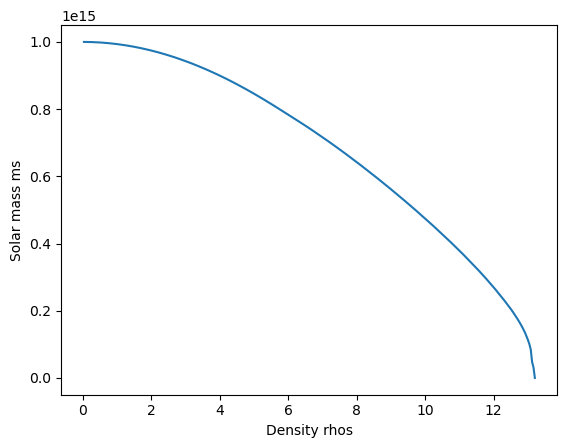

Mass:  2.169943935697563


In [10]:
#dr = 4000
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,4000,5000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass: ",find_mass(ms))

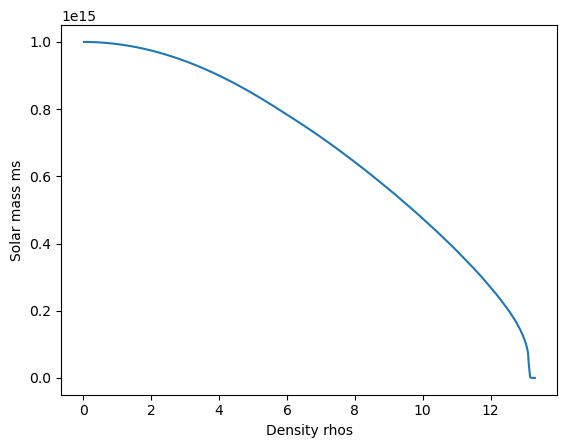

Mass:  2.1697961231228557


In [11]:
#dr = 2000
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,2000,10000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass: ",find_mass(ms))

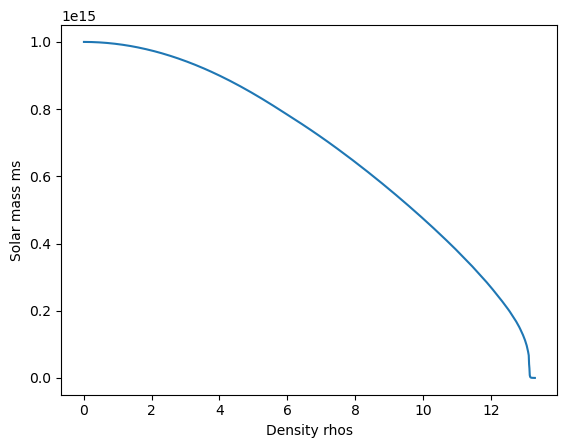

Mass:  2.169785846407223


In [12]:
#dr = 1000

rs, rhos, ps, ms = runge_kutta(1e15,1000,20000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass: ",find_mass(ms))

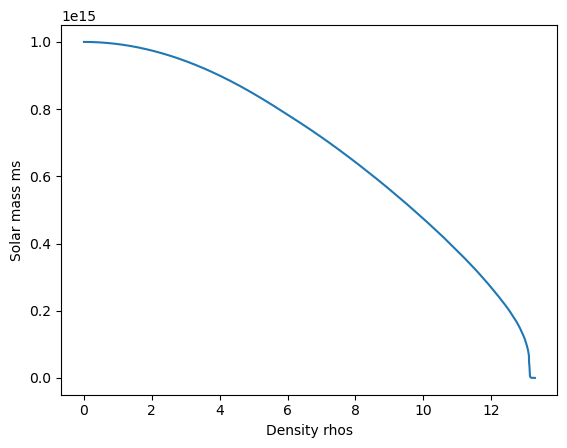

Mass 2.169783064060471


In [13]:
#dr = 500
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,500,40000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass",find_mass(ms))


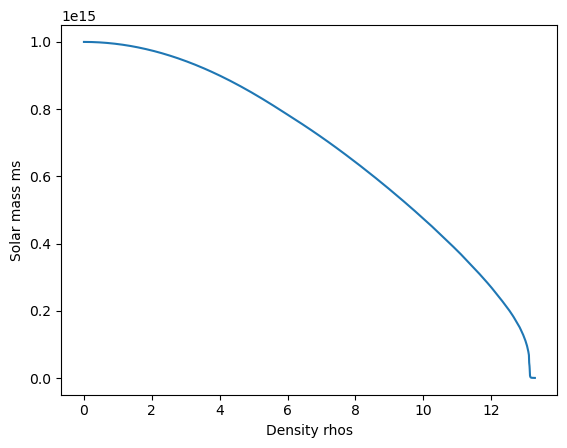

Mass 2.1697822551328056


In [14]:
#dr = 250
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,250,80000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass",find_mass(ms))

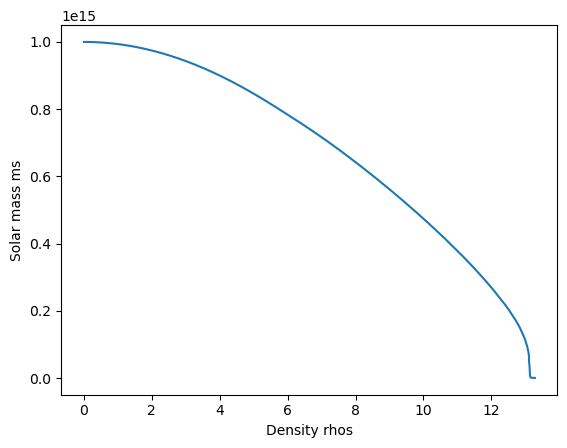

Mass 2.16978208040952


In [15]:


#dr = 100
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,125,160000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()
print("Mass",find_mass(ms))

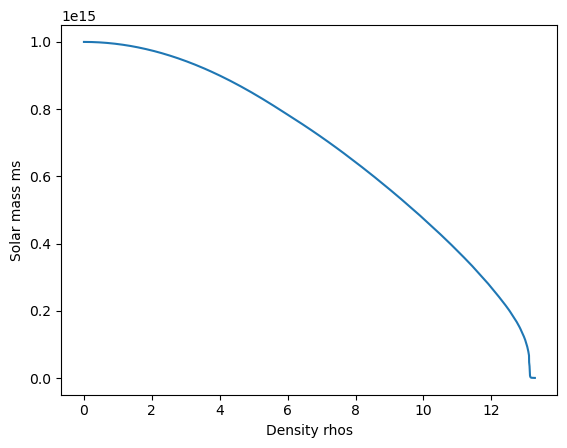

In [16]:
#dr = 10
###############################rho_c,dr,loops
rs, rhos, ps, ms = runge_kutta(1e15,10,200000)

rs = np.array(rs) / 1e5
ms = np.array(ms) / 2e33
    
fig, ax = plt.subplots(ncols=1, nrows=1)
x = rs
ax.set_xlabel('Density rhos')
# Y-axis values 
y = rhos
ax.set_ylabel('Solar mass ms')
# Function to plot 
ax.plot(x, y)
 
# function to show the plot 
plt.show()

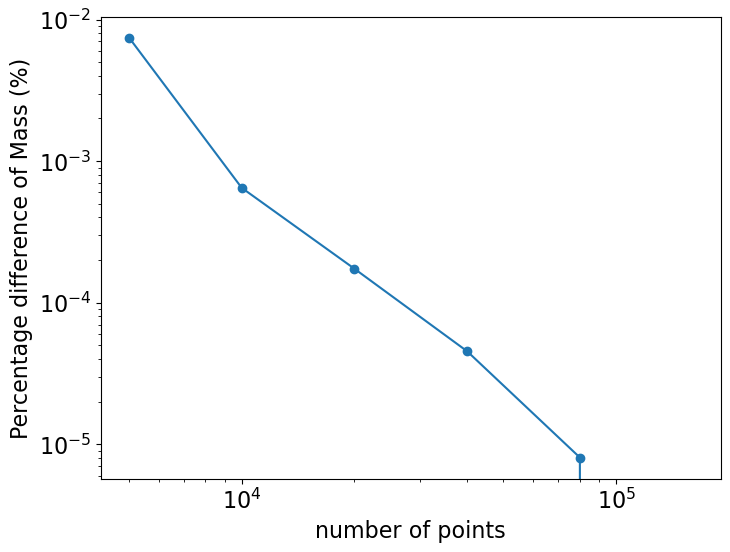

In [22]:
npoints = [5000,10000,20000,40000,80000,160000]
masses = [2.169943935697563,2.1697961231228557,2.169785846407223,2.169783064060471,2.1697822551328056,2.16978208040952]

mass_diffs = [(m - masses[-1])/masses[-1]*100 for m in masses]

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,6))
plt.rcParams.update({"font.size":24})
x = npoints
ax.set_xlabel('number of points')
# Y-axis values 
y = mass_diffs
ax.set_ylabel('Percentage difference of Mass (%)')

ax.set_xscale('log')
ax.set_yscale('log')

# Function to plot 
ax.plot(x, y, "-o")
 
# function to show the plot 
plt.show()

In [15]:
def gen_ns(rho_c,ds,loops):
    """


    """
    rs, rhos, ps, ms = runge_kutta(rho_c,ds,loops)
    return rs,rhos,ps,ms
gen_ns(1e15,4000,5000)

print("Radius: ",find_radius(rs))
print("Mass: ",find_mass(ms))

Radius:  1323000
Mass:  4.341390115709704e+33


In [17]:
def print_ns_MR(radius,mass):
    fig, ax = plt.subplots(ncols=1, nrows=1)
    x = radius
    ax.set_xlabel('Radius rhos')
    # Y-axis values 
    y = mass
    ax.set_ylabel('Solar mass ms')
    # Function to plot 
    ax.plot(x, y, "-o")
    # function to show the plot 
    # plt.show()
    return plt



print("End of Program")

End of Program


In [ ]:
rhos_cs=[2e14,2.25e14,2.5e14,2.75e14,3e14,3.25e14,3.5e14,3.75e14,4e14,4.25e14,4.5e14,4.75e14,5e14,5.5e14,
        6e14,6.5e14,7e14,7.5e14,8e14,8.5e14,9e14,9.5e14,10e14,10.5e14,
        11e14,12e14,13e14,14e14,15e14,16e14,17e14,18e14,19e14,20e14,
        21e14,22e14,23e14,24e14,25e14,26e14,27e14,28e14,29e14,30e14]
mass_cs = []
radius_cs = []

for z in rhos_cs:
        rs,rhos,ps,ms= gen_ns(z,2000,10000)
        mass_cs.append(find_mass(ms)/2e33)
        radius_cs.append(find_radius(rs)/1e5)

print_ns_MR(radius_cs,mass_cs )
plt.show()


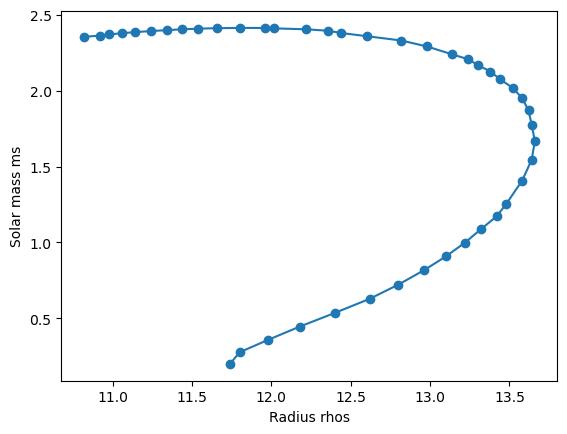

In [19]:
print_ns_MR(radius_cs,mass_cs)
plt.show()